In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')


In [75]:
movie = pd.read_csv("./datas/movie2015~2020.csv", index_col=[0])
movie.reset_index(drop=True)

,Code,Movie,Audience,Screen,genres,AgeRate,month,year,four_month,year_cat
0,20192193,도굴,565.469,1634,범죄,청소년관람가,11,2020,4,35
1,20197121,삼진그룹 영어토익반,1257.444,1080,드라마,청소년관람가,10,2020,4,35
2,20199816,담보,1702.252,407,드라마,청소년관람가,9,2020,4,35
3,20208508,미스터트롯: 더 무비,140.594,159,공연,전체관람가,10,2020,4,35
4,20194424,소리도 없이,401.759,126,범죄,청소년관람가,10,2020,4,35
...,...,...,...,...,...,...,...,...,...,...
352,20145501,돌연변이,100.498,7,드라마,청소년관람가,10,2015,4,30
353,20157465,그놈이다,1045.218,35,스릴러,청소년관람가,10,2015,4,30
354,20157464,더 폰,1593.592,7,스릴러,청소년관람가,10,2015,4,30
355,20142855,성난 변호사,1127.747,21,범죄,청소년관람가,10,2015,4,30


## 1. 연도별 총 영화 개봉 수
### - 코로나 여파로 인해 2020년에는 영화가 많이 개봉하지 않았을 것으로 예상
### - 2015~2020년 기간 중 가장 적진 않지만 지난 해에 비해 개봉 수가 21 감소하였음.


In [134]:
# 연도별 총 영화 개봉 수
year_c = movie.groupby('year').size().to_frame()
year_c

,0
year,
2015,27
2016,64
2017,64
2018,77
2019,73
2020,52


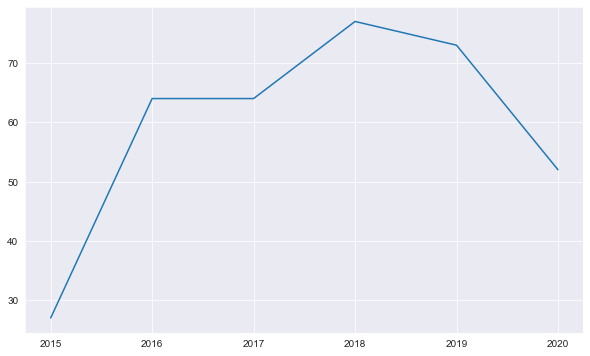

In [96]:
# 2018년에 77개로 가장 많았음
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot(year_c);

In [101]:
### 2. 연도 관계 없이 월별 총 영화 개봉 수
# month_c = movie.groupby('month').size().to_frame()
# month_c

In [99]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(10,6))
# plt.plot(month_c);

## 2. 월별 총 영화 개봉 수
### - 명절(1월, 9월), 크리스마스 시즌(12월) 등 연휴가 있는 달에는 외출과 만남이 더 자주 있어서 영화 개봉 수가 많을 것으로 예상
### - 지난해에 비해 2020년 영화 개봉 수는 감소하였으나, 2020년 9월에 수가 전체에서 가장 많았음.
### - 9월에 많다면 가족이 함께 관람할 수 있는 장르의 영화가 많을 것으로 예상하여 확인한 결과 드라마(2), 코미디(3) 장르의 영화가 많았음.
### (담보, 오!문희, 국제수사, 죽지않는 인간들의 밤, 강철비2)

In [102]:
# my_c = movie.groupby(['month', 'year']).size().to_frame()
# my_c

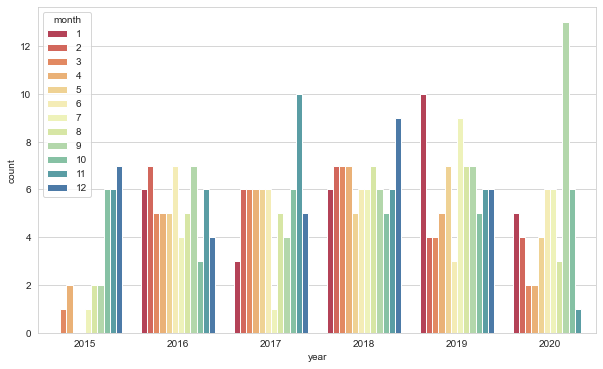

In [81]:
# 2020년 9월에 13개로 가장 많았음
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='year', hue='month', data=movie, palette='Spectral');

In [86]:
# 가장 많이 개봉했던 2020년 9월 영화 장르
m_20 = movie[movie['year'] == 2020]
m_20_9 = m_20[m_20['month'] == 9]
m_20_9.groupby('genres').size().to_frame()

,0
genres,
공연,1
공포(호러),1
다큐멘터리,1
드라마,2
뮤지컬,1
스릴러,1
애니메이션,2
액션,1
코미디,3


In [106]:
m_20_9

,Code,Movie,Audience,Screen,genres,AgeRate,month,year,four_month,year_cat
2,20199816,담보,1702.252,407,드라마,청소년관람가,9,2020,4,35
6,20178401,검객,188.990,23,액션,청소년관람가,9,2020,4,35
7,20206588,극장판 미니특공대: 햄버거괴물의 습격,55.468,38,애니메이션,전체관람가,9,2020,4,35
9,20206826,"그대, 고맙소 : 김호중 생애 첫 팬미팅 무비",100.725,53,공연,전체관람가,9,2020,4,35
10,20193666,오! 문희,350.993,20,코미디,청소년관람가,9,2020,4,35
11,20204684,브레이크 더 사일런스: 더 무비,131.693,66,다큐멘터리,전체관람가,9,2020,4,35
12,20190601,디바,107.480,6,스릴러,청소년관람가,9,2020,4,35
14,20184482,국제수사,534.629,11,코미디,청소년관람가,9,2020,4,35
15,20190621,죽지않는 인간들의 밤,101.663,7,코미디,청소년관람가,9,2020,4,35
17,20208045,강철비2 : 정상회담 확장판,17.918,48,드라마,청소년관람가,9,2020,4,35


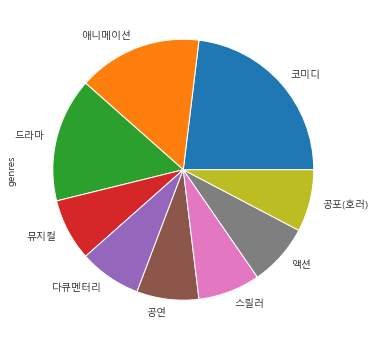

In [104]:
# 가장 많이 개봉했던 2020년 9월 영화 장르 그래프
from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

plt.figure(figsize=(10,6))
m_20_9['genres'].value_counts().plot.pie();

## 3. 각 계절별 총 영화 개봉 수
### - 월을 사계절로 묶은 후 월별 영화 개봉 수에 변화가 있는지 확인
### - 전체 년도 합해서 각 계절을 살폈을 때 가을이 가장 많았음.
### - 년도별로 각 계절을 확인했을 땐 2018년 겨울이 가장 많음.
### - 겨울에는 로맨스 영화가 많을 것으로 예상했으나, 드라마와 범죄 영화가 가장 많았음.
## - 전체적으로 추운 계절인 가을과 겨울에 영화가 가장 많이 개봉하는 것으로 보인다.

```
four_month
4 : 9~11월
3 : 6~8월
2 : 3~5월
1 : 12~2월
```

In [125]:
# 봄에 영화를 보러 가는 사람이 가장 작다! 영화가 적은 것일까? 볼만한 영화가 별로 없는것일까?
# 계절별 총관객수
import plotly.express as px
fig = px.histogram(movie, x="four_month", y="Audience").update_xaxes(categoryorder="total ascending")
fig.show()

In [48]:
# 전체 년도 합해서 각 계절에 개봉한 총 영화
movie.groupby('four_month').size().to_frame()

,0
four_month,
1,89
2,79
3,84
4,105


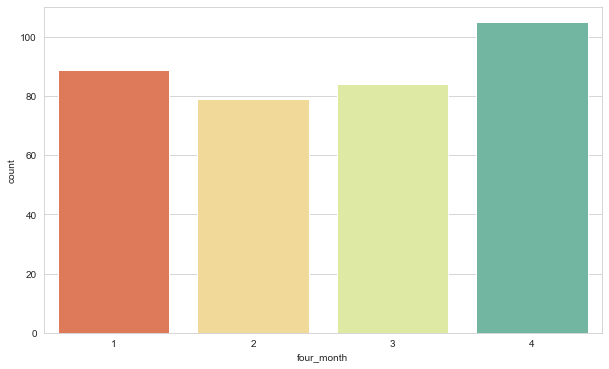

In [126]:
# 전체 년도 합해서 각 계절에 개봉한 총 영화 그래프
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='four_month', data=movie, palette='Spectral');

In [51]:
# 년도별 각 계절의 총 영화 개봉 수
movie.groupby(['year', 'four_month']).size().to_frame()

0
year four_month    
2015 1            7
     2            3
     3            3
     4           14
2016 1           17
     2           15
     3           16
     4           16
2017 1           14
     2           18
     3           12
     4           20
2018 1           22
     2           19
     3           19
     4           17
2019 1           20
     2           16
     3           19
     4           18
2020 1            9
     2            8
     3           15
     4           20

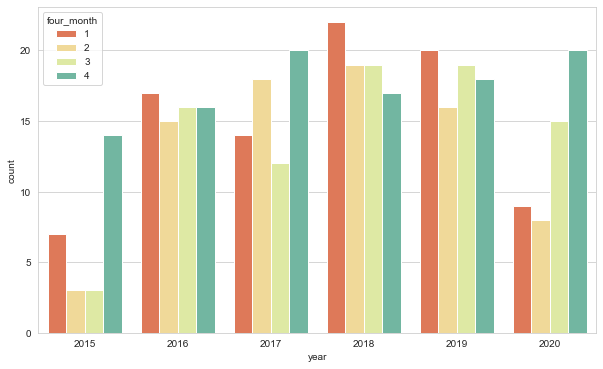

In [52]:
# 년도별 각 계절의 총 영화 개봉 수 그래프
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='year', hue='four_month', data=movie, palette='Spectral');

In [105]:
# 가장 많이 개봉했던 2018년 겨울 영화 장르 그래프
m_18 = movie[movie['year'] == 2018]
m_18_1 = m_18[m_18['four_month'] == 1]
m_18_1.groupby('genres').size().to_frame()
# len(m_18_1)

,0
genres,
가족,1
다큐멘터리,2
드라마,4
범죄,4
사극,2
스릴러,1
애니메이션,3
액션,2
코미디,3


## 4. 장르별 총 영화 개봉 수
### - 모든 영화 중 범죄, 액션, 스릴러 장르의 영화 가장 많이 개봉하는 것으로 예상
### - 2015~2020년 개봉한 한국 영화에는 드라마(75)가 가장 많았고, 다음으로는 코미디(48), 범죄(43), 애니메이션(35)이었음.

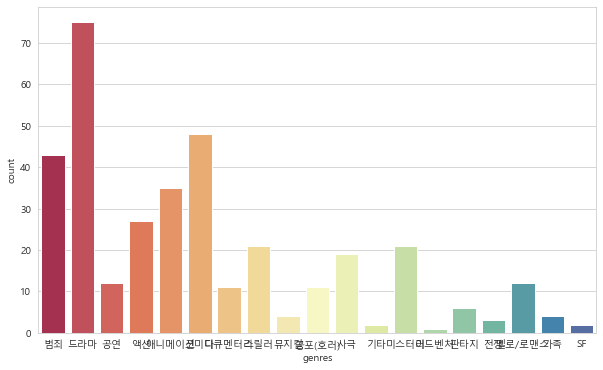

In [112]:
# 장르별 개봉한 총 영화 수 그래프
from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

plt.figure(figsize=(10,6))
sns.countplot(x='genres', data=movie, palette='Spectral');

In [107]:
# 장르별 개봉한 총 영화 수
movie.groupby('genres').size().to_frame()

,0
genres,
SF,2
가족,4
공연,12
공포(호러),11
기타,2
다큐멘터리,11
드라마,75
멜로/로맨스,12
뮤지컬,4


## 5. 계절별 각 장르의 총 영화 개봉 수
### - 공포, 스릴러, 범죄, 액션은 여름에, 사극, 로맨스는 겨을에 가장 많이 개봉할 것으로 예상
### - 년도를 나누지 않고 각 장르가 어느 계절에 많이 개봉했는지 확인한 결과 범죄: 가을, 드라마: 겨울, 액션: 여름, 코미디: 가을, 스릴러: 봄, 공포: 여름, 사극: 가을, 미스터리: 봄 으로 확인
### - 전체적으로 드라마 장르의 영화가 가장 많이 개봉한 것으로 확인 했으며 각 계절로 확인해 보아도 언제나 드라마가 가장 많은 것으로 확인. 관람등급이 대부분 '청소년 관람가'로 분류되어 있으며 관람객들을 가장 많이 끌어드릴 수 있기 때문으로 보임.
```
four_month
4 : 9~11월
3 : 6~8월
2 : 3~5월
1 : 12~2월
```

In [121]:
movie[movie['genres'] == '드라마']

,Code,Movie,Audience,Screen,genres,AgeRate,month,year,four_month,year_cat
1,20197121,삼진그룹 영어토익반,1257.444,1080,드라마,청소년관람가,10,2020,4,35
2,20199816,담보,1702.252,407,드라마,청소년관람가,9,2020,4,35
16,20206291,피원에이치 : 새로운 세계의 시작,1.912,21,드라마,청소년관람가,10,2020,4,35
17,20208045,강철비2 : 정상회담 확장판,17.918,48,드라마,청소년관람가,9,2020,4,35
18,20196271,강철비2: 정상회담,1789.780,9,드라마,청소년관람가,7,2020,3,35
...,...,...,...,...,...,...,...,...,...,...
392,20157466,"로봇, 소리",475.622,49,드라마,청소년관람가,1,2016,1,31
396,20144442,조선마술사,627.379,53,드라마,청소년관람가,12,2015,1,30
399,20156748,열정같은소리하고있네,654.407,1,드라마,청소년관람가,11,2015,4,30
411,20145501,돌연변이,100.498,7,드라마,청소년관람가,10,2015,4,30


<Figure size 720x432 with 0 Axes>

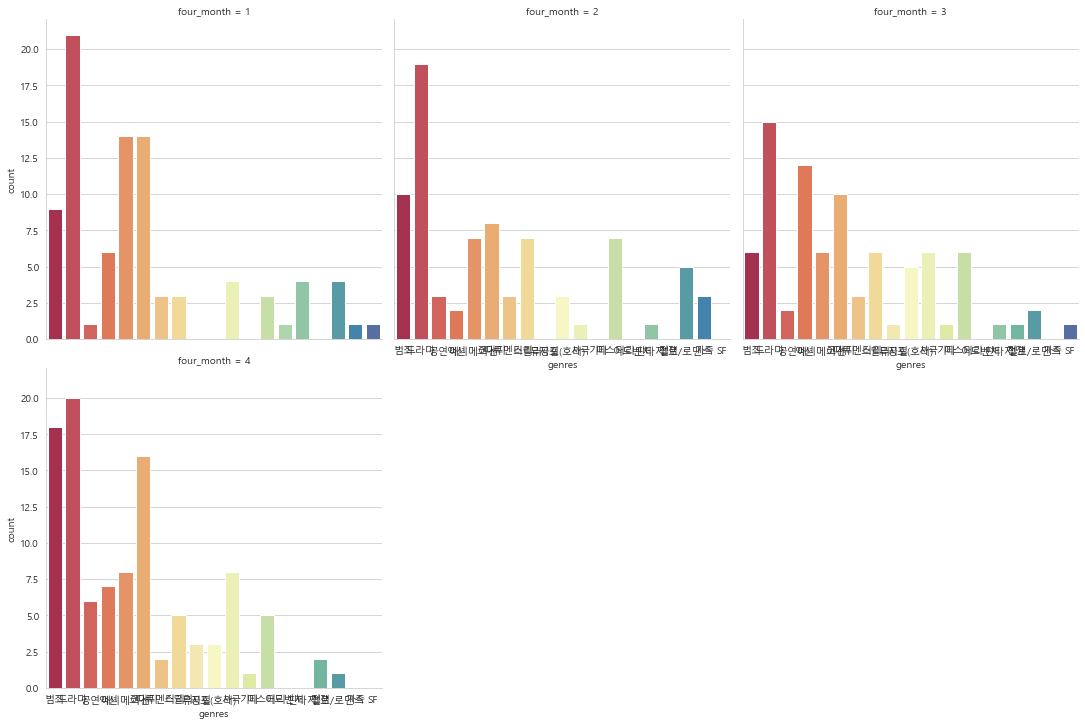

In [127]:
# 계절별 각 장르의 영화 수
plt.figure(figsize=(10,6))
sns.catplot(data=movie, x='genres', col='four_month', kind='count', 
            col_wrap=3, palette='Spectral', legend=False);

## 6. 년도별 각 장르의 영화 개봉 수
### - 계절별로 확인했을 때는 매년 드라마가 가장 많지만 2020년에는 드라마와 코미디 개봉 수(10)가 같았다. 코로나로 힘들 때 코미디 영화로 위로를 얻을 수 있을 것이다.

In [170]:
movie

,Code,Movie,Audience,Screen,genres,AgeRate,month,year,four_month,year_cat
0,20192193,도굴,565.469,1634,범죄,청소년관람가,11,2020,4,35
1,20197121,삼진그룹 영어토익반,1257.444,1080,드라마,청소년관람가,10,2020,4,35
2,20199816,담보,1702.252,407,드라마,청소년관람가,9,2020,4,35
3,20208508,미스터트롯: 더 무비,140.594,159,공연,전체관람가,10,2020,4,35
4,20194424,소리도 없이,401.759,126,범죄,청소년관람가,10,2020,4,35
...,...,...,...,...,...,...,...,...,...,...
411,20145501,돌연변이,100.498,7,드라마,청소년관람가,10,2015,4,30
412,20157465,그놈이다,1045.218,35,스릴러,청소년관람가,10,2015,4,30
413,20157464,더 폰,1593.592,7,스릴러,청소년관람가,10,2015,4,30
414,20142855,성난 변호사,1127.747,21,범죄,청소년관람가,10,2015,4,30


In [131]:
# 년도별 각 장르 개봉 수
movie.groupby(['year', 'genres']).size().to_frame()

0
year genres    
2015 공연       2
     드라마      5
     멜로/로맨스   1
     미스터리     2
     범죄       4
...          ..
2020 스릴러      2
     애니메이션    4
     액션       6
     코미디     10
     판타지      1

[84 rows x 1 columns]

In [130]:
# 2020년 장르별 영화 개봉 수
movie[movie['year'] == 2020].groupby('genres').size()

genres
공연         6
공포(호러)     1
다큐멘터리      3
드라마       10
뮤지컬        1
미스터리       3
범죄         4
사극         1
스릴러        2
애니메이션      4
액션         6
코미디       10
판타지        1
dtype: int64

c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backe

<Figure size 720x432 with 0 Axes>

c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51396 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\matplotlib\backends\backen

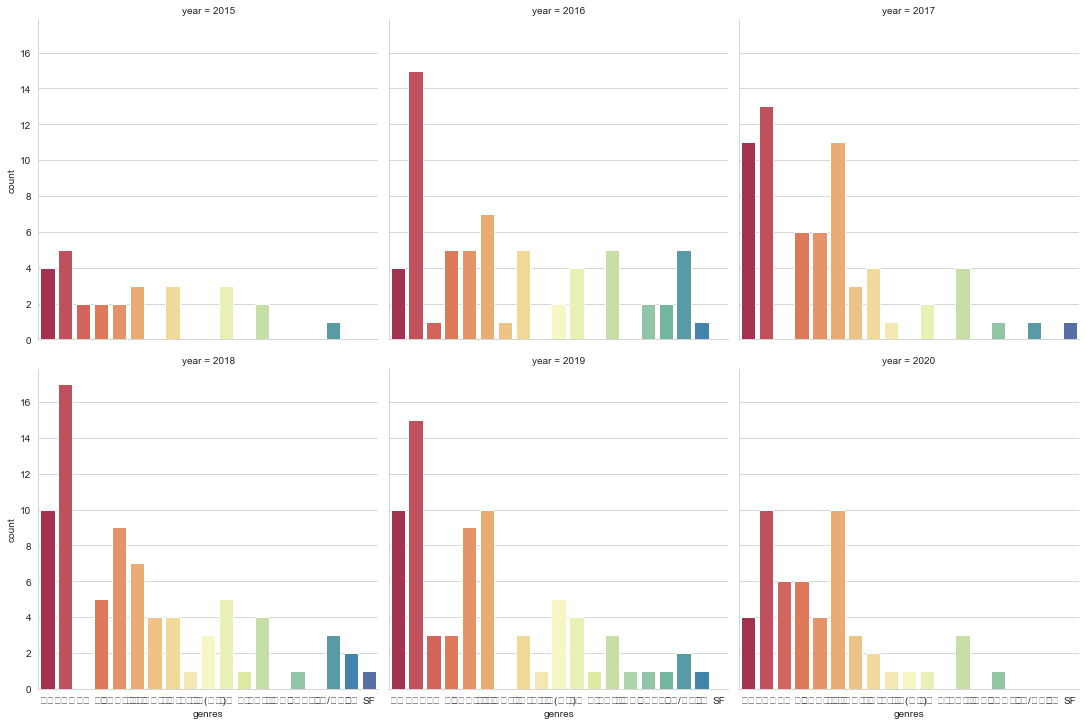

In [117]:
# 년도별 각 장르의 개봉 수 그래프
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.catplot(data=movie, x='genres', col='year', kind='count', 
            col_wrap=3, palette='Spectral');

In [111]:
movie.to_csv('./datas/movie2015~2020.csv', sep=',', encoding='utf-8')